This example investigates the effect of flight altitudes for a drone investigation.

In [76]:
import numpy as np
from saem import CSEMData

In [77]:
fMin, fMax = 8, 1100
f = np.round(2**np.arange(0, np.log2(fMax/fMin), 0.5) * fMin)
f = np.hstack((f[0:5:2], f[6:]))
print(f)

[   8.   16.   32.   64.   91.  128.  181.  256.  362.  512.  724. 1024.]


CSEM data with 29 stations and 12 frequencies
Transmitter length 2000m
Median Rx distance 100.0m
Sounding pos at 100.000000,0.000000,100.000000,


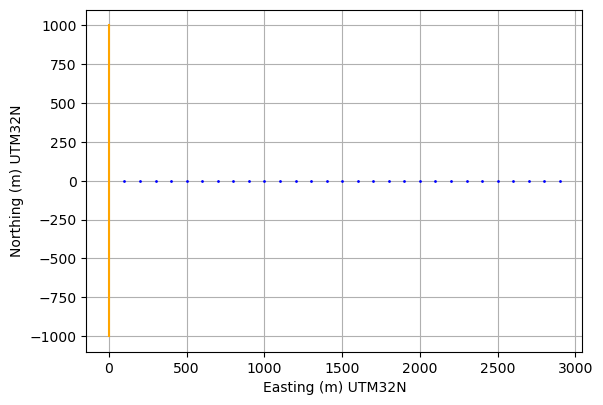

In [78]:
x = np.arange(100, 3000, 100)  # receiver positions
txLen = 2000  # length of the transmitter
csem10 = CSEMData(f=f, rx=x, rz=100, tx=[0, 0], ty=[-txLen/2, txLen/2])
csem10.cmp = [1, 0, 1]
print(csem10)
ax = csem10.showPos()

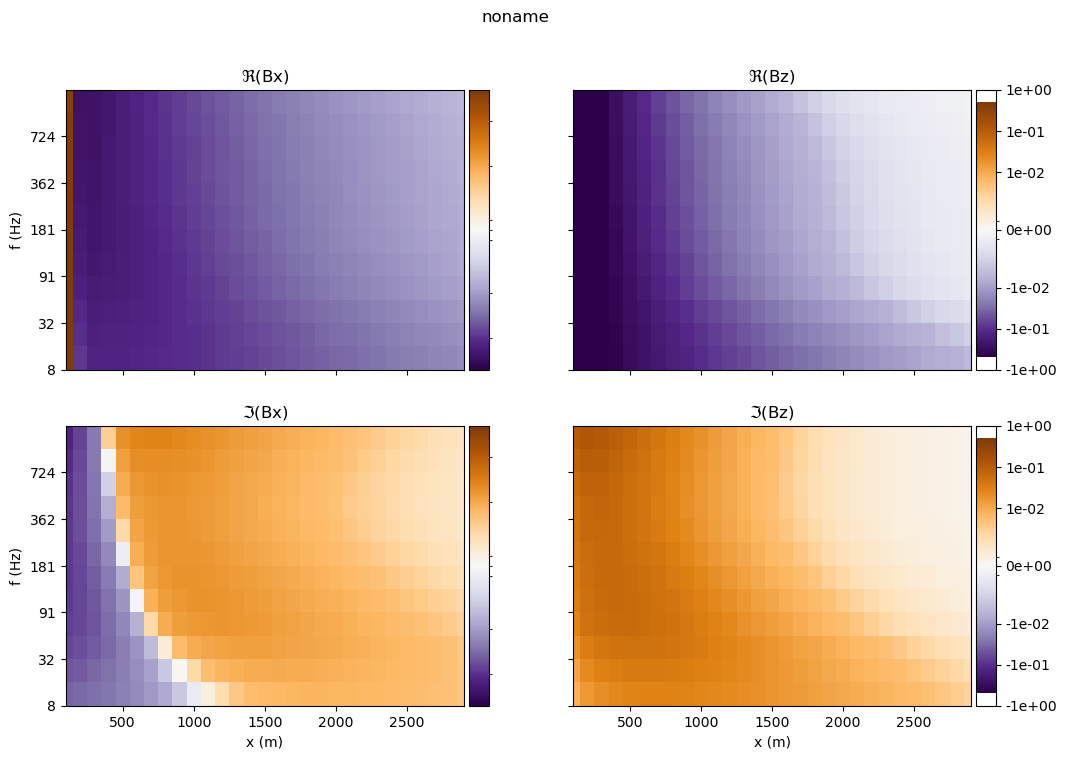

In [79]:
model = dict(rho=[300, 10, 300, 5], thk=[200, 100, 200])
csem10.simulate(**model)
csem10.DATA = csem10.RESP
csem10.showLineData(alim=[0.005, 0.5]);

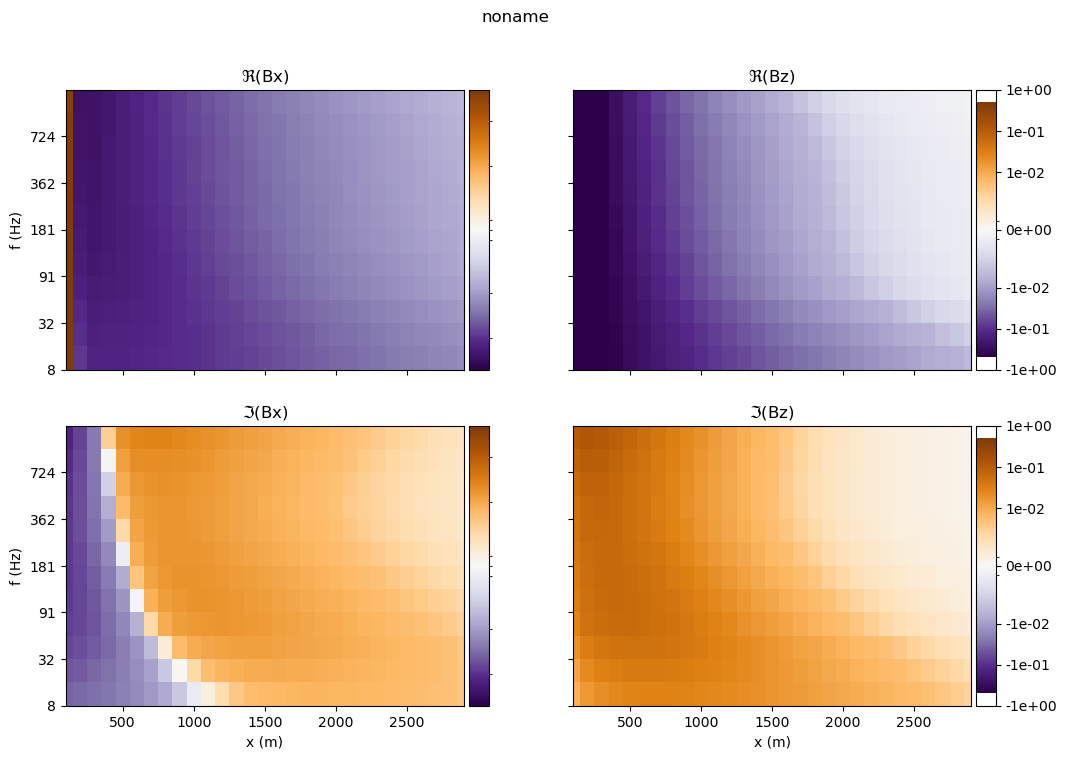

In [80]:
csem40 = CSEMData(f=f, rx=x, tx=[0, 0], ty=[-txLen/2, txLen/2], rz=300)
csem40.cmp = [1, 0, 1]
csem40.simulate(**model)
csem10.showLineData(alim=[0.005, 0.5]);

In [81]:
csem40.DATA = csem40.RESP

closest point at distance is  0.0
Tx distance  1000.0
closest point at distance is  0.0
Tx distance  1000.0


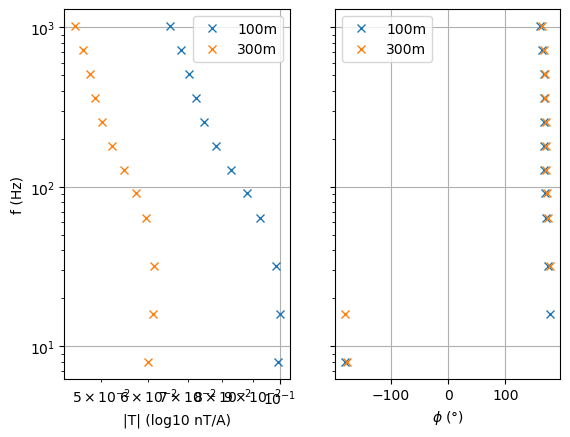

In [93]:
pos = [1000, 0]
ax = csem10.showSounding(position=pos, color="C0", cmp=[1, 0, 0], label="100m")
csem40.showSounding(pos, ax=ax, color="C1", cmp=[1, 0, 0], label="300m");

closest point at distance is  0.0
Tx distance  1000.0
closest point at distance is  0.0
Tx distance  1000.0


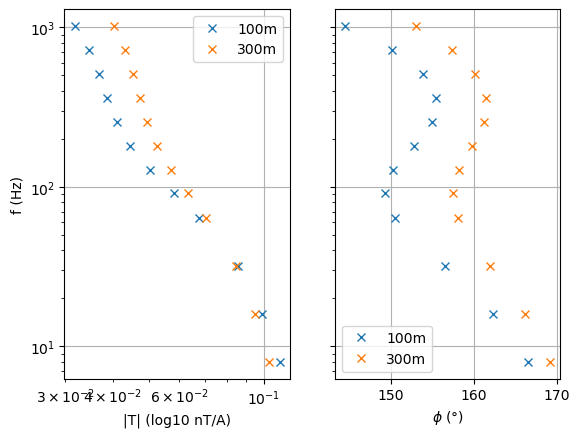

In [94]:
ax = csem10.showSounding(position=pos, color="C0", cmp=[0, 0, 1], label="100m")
csem40.showSounding(pos, ax=ax, color="C1", cmp=[0, 0, 1], label="300m");

In [95]:
csem10.createDepthVector()
csem10.depth *= 0.5
csem40.createDepthVector()
csem40.depth *= 0.5

15/12/23 - 22:22:42 - pyGIMLi - INFO - Starting inversion.


fop: <saem.modelling.fopSAEM object at 0x00000248B90B4D60>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000248B24C0D60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000248B90B4F40>
min/max (data): -0.11/0.03
min/max (error): 3.93%/92.81%
min/max (start model): 7.53/573
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    0.57
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    0.57 (dPhi = 0.16%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.57)                   #
################################################################################


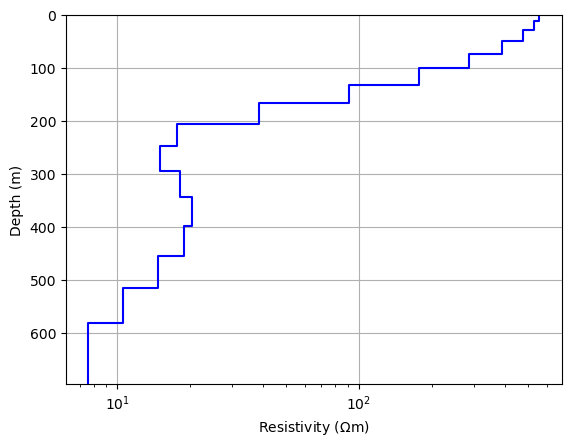

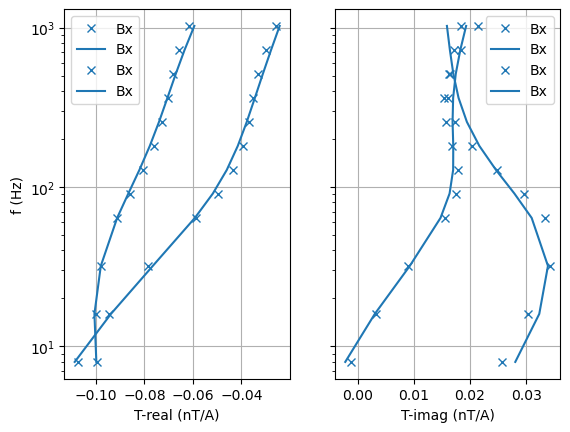

In [96]:
model10 = csem10.invertSounding(relError=0.03, absError=0.001, show=True, verbose=True)

15/12/23 - 22:22:43 - pyGIMLi - INFO - Starting inversion.


fop: <saem.modelling.fopSAEM object at 0x00000248B8AE6EF0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000248B8F5FD00>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000248B8AE6C70>
min/max (data): -0.1/0.03
min/max (error): 3.98%/147%
min/max (start model): 8.38/586
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    0.47
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    0.47 (dPhi = 0.04%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.47)                   #
################################################################################


array([[557.44097332, 576.44523789],
       [531.886402  , 544.2494367 ],
       [475.66659943, 477.34453953],
       [389.79729677, 381.52665108],
       [284.16893013, 271.35144974],
       [177.37201557, 166.94486327],
       [ 91.04732113,  86.832092  ],
       [ 38.78402496,  39.38766246],
       [ 17.72991203,  19.62169847],
       [ 14.99652365,  15.76849848],
       [ 18.14732137,  17.25864087],
       [ 20.4080326 ,  18.40475087],
       [ 18.91174293,  17.09379201],
       [ 14.77845509,  14.0329931 ],
       [ 10.54987152,  10.82728191],
       [  7.61327895,   8.42156974]])

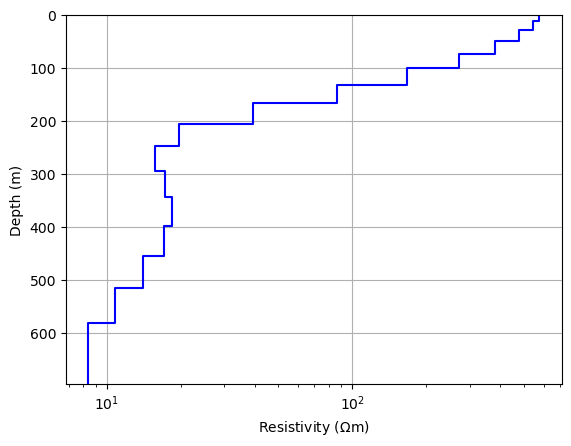

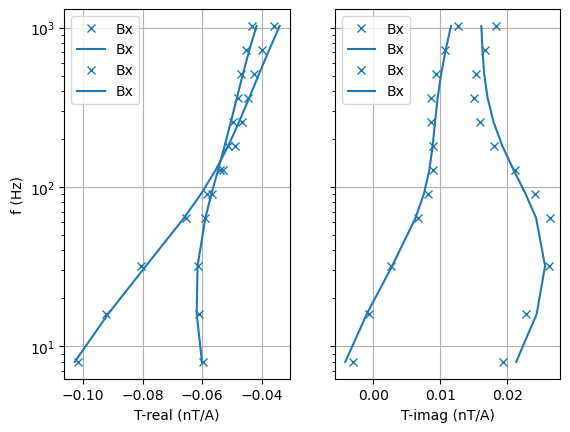

In [97]:
model40 = csem40.invertSounding(relError=0.03, absError=0.001, show=True, verbose=True)
np.column_stack([model10, model40])

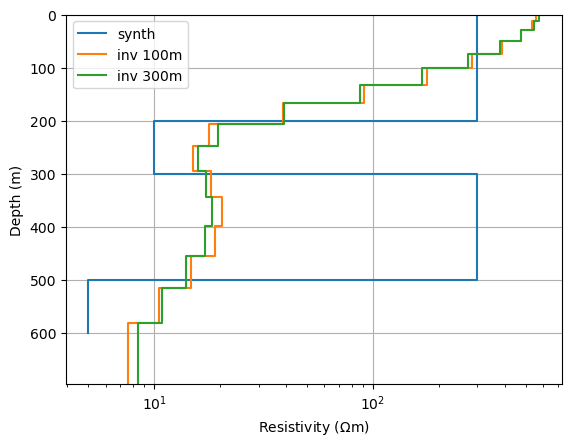

In [98]:
import matplotlib.pyplot as plt
from pygimli.viewer.mpl import drawModel1D
fig, ax = plt.subplots()
drawModel1D(ax, model["thk"], model["rho"], color="C0", plot='semilogx', label="synth")
drawModel1D(ax, np.diff(csem10.depth), csem10.model, color="C1", plot='semilogx', label="inv 100m")
drawModel1D(ax, np.diff(csem10.depth), csem40.model, color="C2", plot='semilogx', label="inv 300m")
ax.legend()